# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# LOADING THE DATASET

In [2]:
df=pd.read_csv('temprature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Top 5 heads of the dataset.

In [3]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


Bottom 5 of the dataset.

In [5]:
df.shape

(7752, 25)

7752 rows and 25 columns in the dataset.

# CHECKING NULL VALUES 

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Null values are present in almost every columns.

# CHECKING DATATYPE OF THE COLUMNS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We have 1 object data type column and remaining all is float data type columns.

In [11]:
# object data type column is date so extracting the date, month and year seperately from that column

df['Day']=pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.day
df['Month']=pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.month
df['Year']=pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.year

In [12]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


Now we can see 3 features added in the dataset.

In [13]:
# we have date, month and year column in the dataset so Date column is not needed so dropping it.
df.drop('Date',axis=1,inplace=True)

In [14]:
df.shape

(7752, 27)

Now we have 7752 rows and 27 columns in the dataset.

# HANDLING NULL VALUES

In [19]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [17]:
df['station']=df['station'].fillna(np.mean(df['station']))
df['Present_Tmax']=df['Present_Tmax'].fillna(np.mean(df['Present_Tmax']))
df['Present_Tmin']=df['Present_Tmin'].fillna(np.mean(df['Present_Tmin']))
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(np.mean(df['LDAPS_RHmin']))
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(np.mean(df['LDAPS_RHmax']))
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(np.mean(df['LDAPS_Tmax_lapse']))
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(np.mean(df['LDAPS_Tmin_lapse']))
df['LDAPS_WS']=df['LDAPS_WS'].fillna(np.mean(df['LDAPS_WS']))
df['LDAPS_LH']=df['LDAPS_LH'].fillna(np.mean(df['LDAPS_LH']))
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(np.mean(df['LDAPS_CC1']))
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(np.mean(df['LDAPS_CC2']))
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(np.mean(df['LDAPS_CC3']))
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(np.mean(df['LDAPS_CC4']))
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(np.mean(df['LDAPS_PPT1']))
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(np.mean(df['LDAPS_PPT2']))
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(np.mean(df['LDAPS_PPT3']))
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(np.mean(df['LDAPS_PPT4']))
df['Next_Tmax']=df['Next_Tmax'].fillna(np.mean(df['Next_Tmax']))
df['Next_Tmin']=df['Next_Tmin'].fillna(np.mean(df['Next_Tmin']))
df['Day']=df['Day'].fillna(np.mean(df['Day']))
df['Month']=df['Month'].fillna(np.mean(df['Month']))
df['Year']=df['Year'].fillna(np.mean(df['Year']))





In [18]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

Now we have no null values in the dataset.

# VISUALIZATION OF NOMINAL DATA BY COUNT PLOT

13.0    312
15.0    310
21.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
12.0    310
9.0     310
24.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
14.0    310
Name: station, dtype: int64


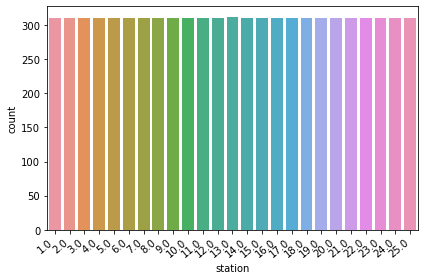

In [21]:
ax=sns.countplot(x='station',data=df)
print(df['station'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

station number 13 is showing 312 values that is maximum and all station number is looking almost equally distributed.

7.000000    3875
8.000000    3750
6.000000     125
7.467742       2
Name: Month, dtype: int64


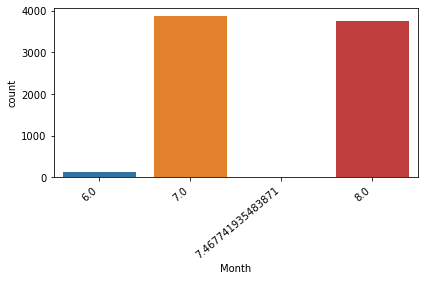

In [26]:
ax=sns.countplot(x='Month',data=df)
print(df['Month'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In 7th month values are maximum that is 3875, 7th and 8th month is almose same.

2015.0    1552
2014.0    1550
2013.0    1550
2016.0    1550
2017.0    1550
Name: Year, dtype: int64


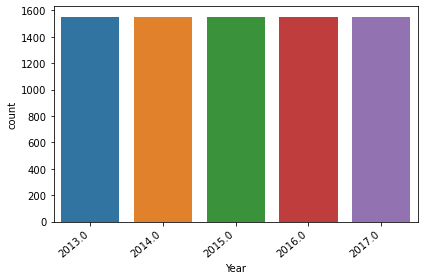

In [27]:
ax=sns.countplot(x='Year',data=df)
print(df['Year'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In year 2015 there was 1552 values that is maximum and all the years looking normally distributed.

# CHECKING THE DISTRIBUTION OF THE FLOAT AND INTEGER TYPE COLUMNS

In [28]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

<AxesSubplot:xlabel='station', ylabel='Density'>

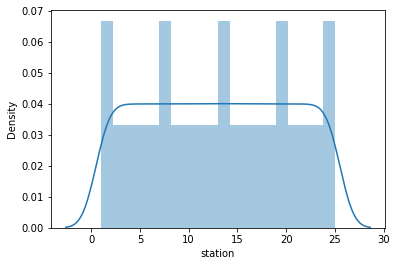

In [29]:
sns.distplot(df['station'],kde=True)

station column is looking normally distributed.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

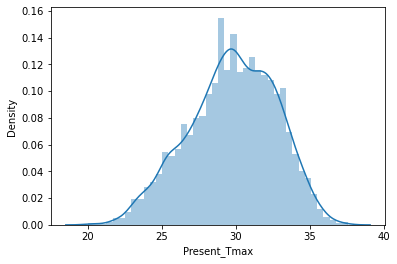

In [30]:
sns.distplot(df['Present_Tmax'],kde=True)

Present_Tmax column is looking almost normally distributed ,very little right skewed.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

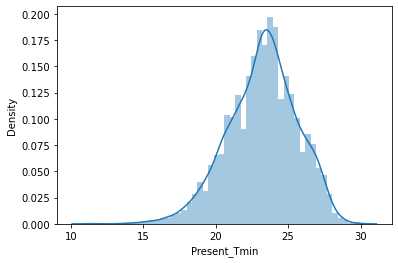

In [31]:
sns.distplot(df['Present_Tmin'],kde=True)

Present_Tmin column is looking almost normally distributed ,very little right skewed.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

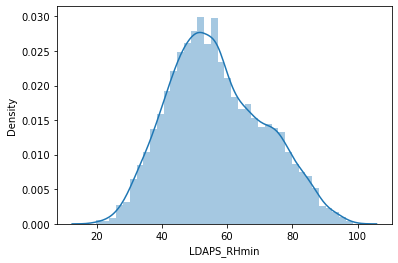

In [32]:
sns.distplot(df['LDAPS_RHmin'],kde=True)

LDAPS_RHmin column is looking normally distributed.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

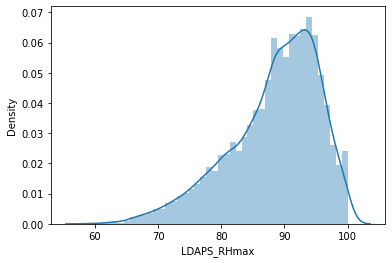

In [33]:
sns.distplot(df['LDAPS_RHmax'],kde=True)

LDAPS_RHmax column is looking right skewed.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

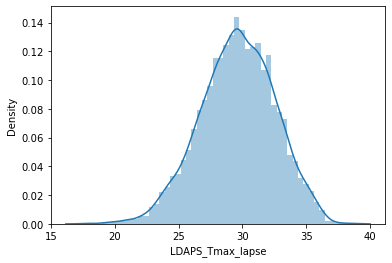

In [34]:
sns.distplot(df['LDAPS_Tmax_lapse'],kde=True)

LDAPS_Tmax_lapse column is looking normally distributed.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

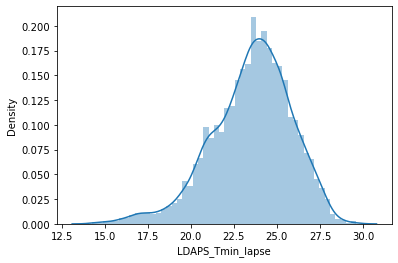

In [35]:
sns.distplot(df['LDAPS_Tmin_lapse'],kde=True)

LDAPS_Tmin_lapse column is looking normally distributed.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

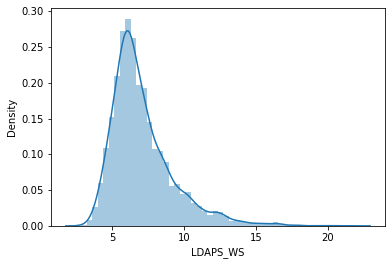

In [36]:
sns.distplot(df['LDAPS_WS'],kde=True)

LDAPS_WS column is not looking normally distributed its lookin left skewed.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

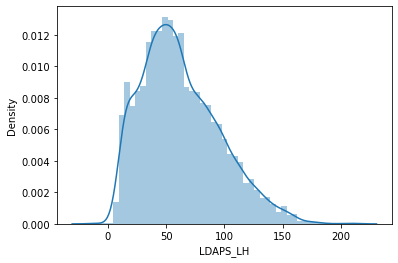

In [37]:
sns.distplot(df['LDAPS_LH'],kde=True)

LDAPS_LH column is almost looking normally distributed.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

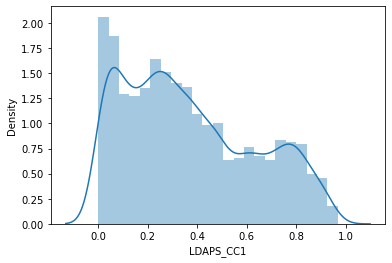

In [38]:
sns.distplot(df['LDAPS_CC1'],kde=True)

LDAPS_CC1 column is looking left skewed and not looking normal.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

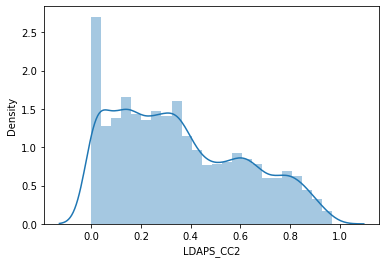

In [39]:
sns.distplot(df['LDAPS_CC2'],kde=True)

LDAPS_CC2 column is looking little left skewed ranges from 0 to 1.0.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

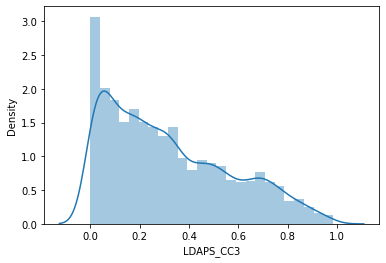

In [40]:
sns.distplot(df['LDAPS_CC3'],kde=True)

LDAPS_CC3 column is looking little left skewed ranges from 0 to 1.0.


<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

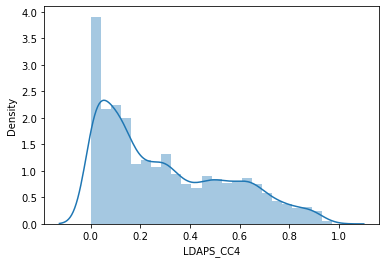

In [41]:
sns.distplot(df['LDAPS_CC4'],kde=True)

LDAPS_CC4 column is looking little bit left skewed ranges from 0 to 1.0.

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

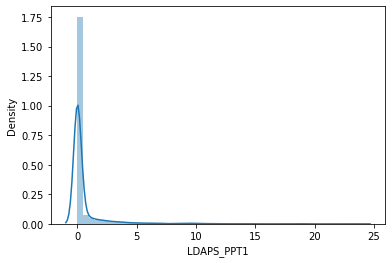

In [42]:
sns.distplot(df['LDAPS_PPT1'],kde=True)

LDAPS_PPT1 column is looking left skewed.

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

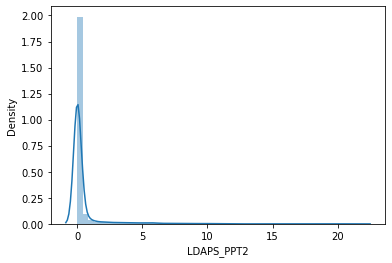

In [43]:
sns.distplot(df['LDAPS_PPT2'],kde=True)

LDAPS_PPT2 column is looking left skewed.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

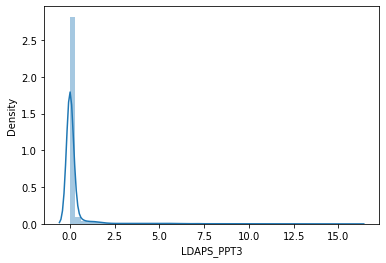

In [44]:
sns.distplot(df['LDAPS_PPT3'],kde=True)

LDAPS_PPT3 column is looking left skewed.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

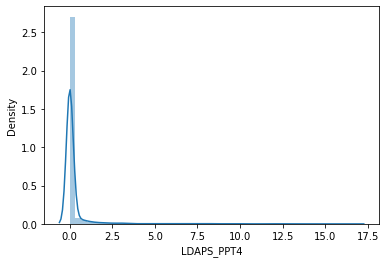

In [45]:
sns.distplot(df['LDAPS_PPT4'],kde=True)

LDAPS_PPT4 column is looking left skewed.

<AxesSubplot:xlabel='lat', ylabel='Density'>

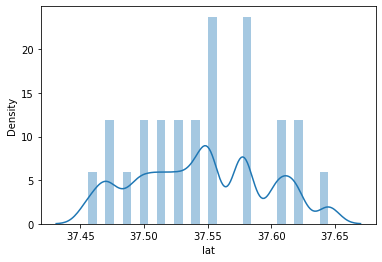

In [46]:
sns.distplot(df['lat'],kde=True)

latitude is showing variation in distributions.

<AxesSubplot:xlabel='lon', ylabel='Density'>

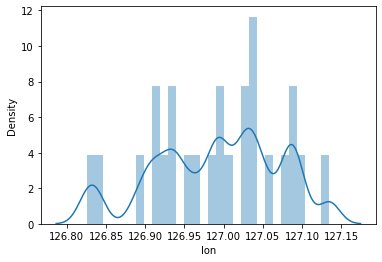

In [49]:
sns.distplot(df['lon'],kde=True)

lonngitude column is showing variation.

<AxesSubplot:xlabel='DEM', ylabel='Density'>

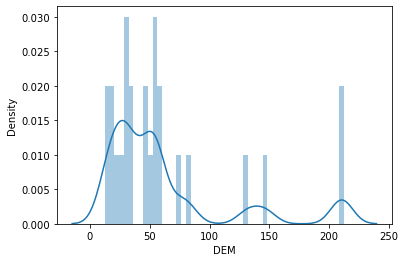

In [51]:
sns.distplot(df['DEM'],kde=True)

DEM(Elevation) column is showing variation ranges from 0 to 100 ,100 to 175 and 200 to 250.

<AxesSubplot:xlabel='Slope', ylabel='Density'>

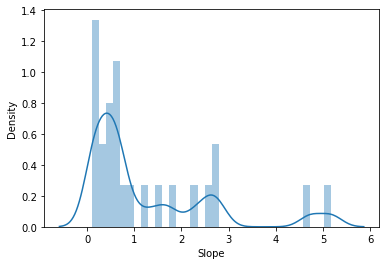

In [52]:
sns.distplot(df['Slope'],kde=True)

Slope column is looking left skewed with variations.

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

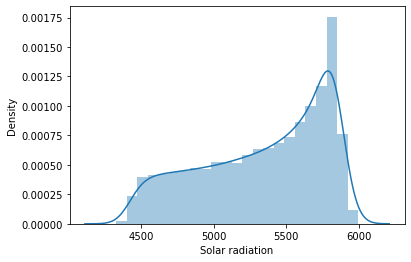

In [53]:
sns.distplot(df['Solar radiation'],kde=True)

Solar radiation column is not looking normally distributed , its looking right skewed.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

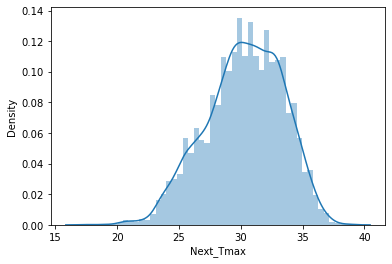

In [54]:
sns.distplot(df['Next_Tmax'],kde=True)

The next-day maximum air temperature(Next_Tmax) column is almost looking normally distributed.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

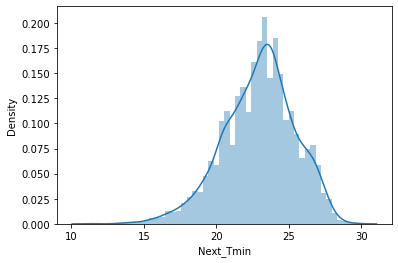

In [56]:
sns.distplot(df['Next_Tmin'],kde=True)

The next-day minimum air temperature (Next_Tmin) column is almost looking normally distributeed.

<AxesSubplot:xlabel='Day', ylabel='Density'>

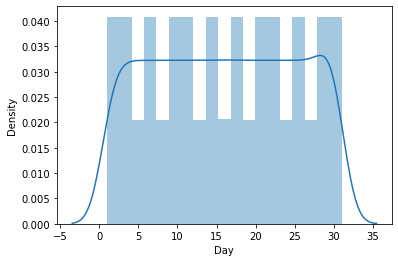

In [57]:
sns.distplot(df['Day'],kde=True)

Day column is looking normally distributed.

<AxesSubplot:xlabel='Month', ylabel='Density'>

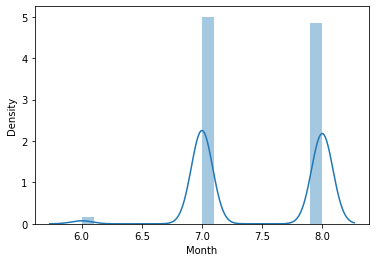

In [58]:
sns.distplot(df['Month'],kde=True)

In Month column there is variation , 7th and 8th month is almost looking same.

# CHECKING OUTLIERS THROUGH BOXPLOT

station                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Present_Tmax        AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Present_Tmin        AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
LDAPS_RHmin         AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
LDAPS_RHmax         AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
LDAPS_Tmax_lapse    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
LDAPS_Tmin_lapse    AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
LDAPS_WS            AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
LDAPS_LH               AxesSubplot(0.125,0.593621;0.0824468x0.130172)
LDAPS_CC1           AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
LDAPS_CC2           AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
LDAPS_CC3           AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
LDAPS_CC4           AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
LDAPS_PPT1          AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
LDAPS_PPT2          

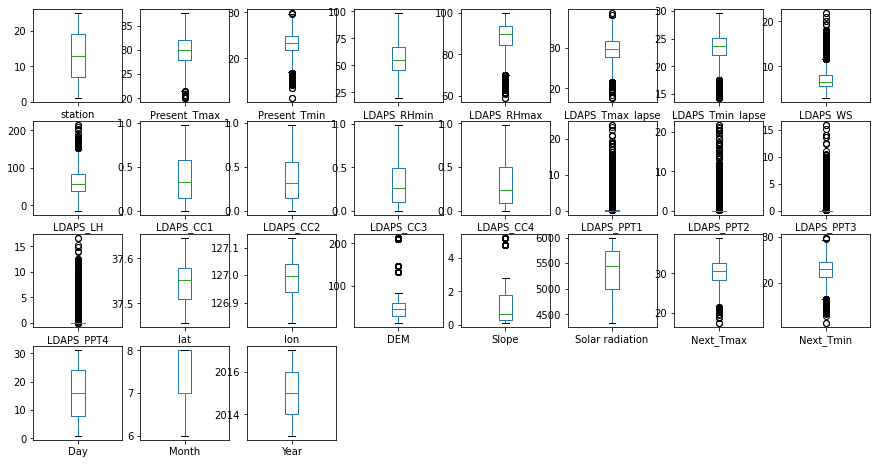

In [70]:
df.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

The columns having outliers are Present_Tmax, Present_Tmin, LDAPS RHmax, LDAPS Tmax lapse, LDAPS Tmin lapse, LDAPS WS, LDAPS LH, LDAPS PPT1, LDAPS PPT2, LDAPS PPT3, LDAPS PPT4, DEM, Slope and in the target column Next Tmax and Next Tmin where outliers wont be treated.

# CHECKING SKEWNESS

In [71]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                -0.008926
Month              -0.195889
Year                0.000000
dtype: float64

columns is in range between +.5 and -.5 are not skewed.

skewed columns are:

LDAPS_RHmax

LDAPS_Tmin_lapse

LDAPS_WS

LDAPS_LH

LDAPS_CC3

LDAPS_CC4

LDAPS_PPT1

LDAPS_PPT3 

LDAPS_PPT4

DEM

Slope






# STATISTICAL SUMMARY

<AxesSubplot:>

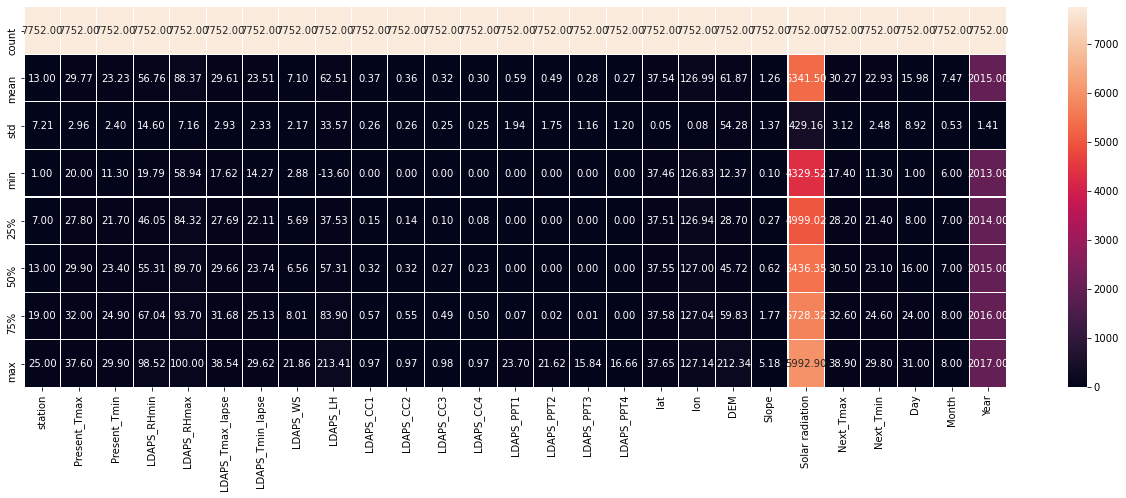

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths =0.1,fmt='0.2f')

In [72]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,15.983871,7.467742,2015.000000
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,8.917496,0.530265,1.414122
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,6.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,8.000000,2017.000000


Number of count is same in every columns.

There is not much difference between mean and median(50%) in any column.

There is some difference between 75% and max in LDAPS_WS, LDAPS_LH, DEM.

And data  is not much deviated.

# CORRELATION MATRIX

In [74]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,...,-2.375015e-01,-1.187044e-01,-2.558297e-01,-9.006090e-02,-0.019001,0.107983,0.128293,8.896117e-18,-1.486474e-16,1.435563e-15
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-5.261489e-02,9.019776e-03,-1.871206e-01,-1.058092e-01,-0.025439,0.610348,0.622741,-1.418534e-01,1.459523e-01,5.980007e-02
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,-7.847529e-02,-4.346122e-02,-2.502747e-01,-1.463390e-01,0.053578,0.471806,0.796670,-1.061035e-01,8.731509e-02,3.739568e-02
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,8.709887e-02,-7.623712e-02,1.021149e-01,1.237439e-01,0.244080,-0.437898,0.095019,-6.313598e-02,-1.890050e-01,-2.044507e-03
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,1.957977e-01,2.566694e-02,1.771681e-01,2.195989e-01,0.149261,-0.283738,-0.071997,-1.505018e-02,-1.178093e-01,-1.418320e-01
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-4.209291e-02,9.066575e-02,-1.788954e-01,-1.623324e-01,0.047971,0.827189,0.586868,-1.593779e-01,9.734192e-02,1.617217e-02
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-9.625683e-02,-2.670103e-02,-1.954553e-01,-1.858487e-01,0.159975,0.586983,0.880176,-1.727315e-01,2.338827e-02,-4.693413e-03
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,3.665702e-02,-5.946615e-02,1.910530e-01,1.716286e-01,0.121759,-0.342729,-0.096576,-4.068799e-02,-1.115865e-01,-1.113577e-01
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,1.332208e-01,2.582205e-02,5.513344e-02,8.678088e-02,-0.047384,0.157616,-0.055440,-2.080335e-02,6.588749e-02,5.707733e-02
LDAPS_CC1,6.918787e-03,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,-8.130615e-03,-6.842827e-03,-1.409033e-02,-2.075199e-02,0.218309,-0.452541,-0.011028,-2.529515e-02,-2.094583e-01,-6.647797e-02


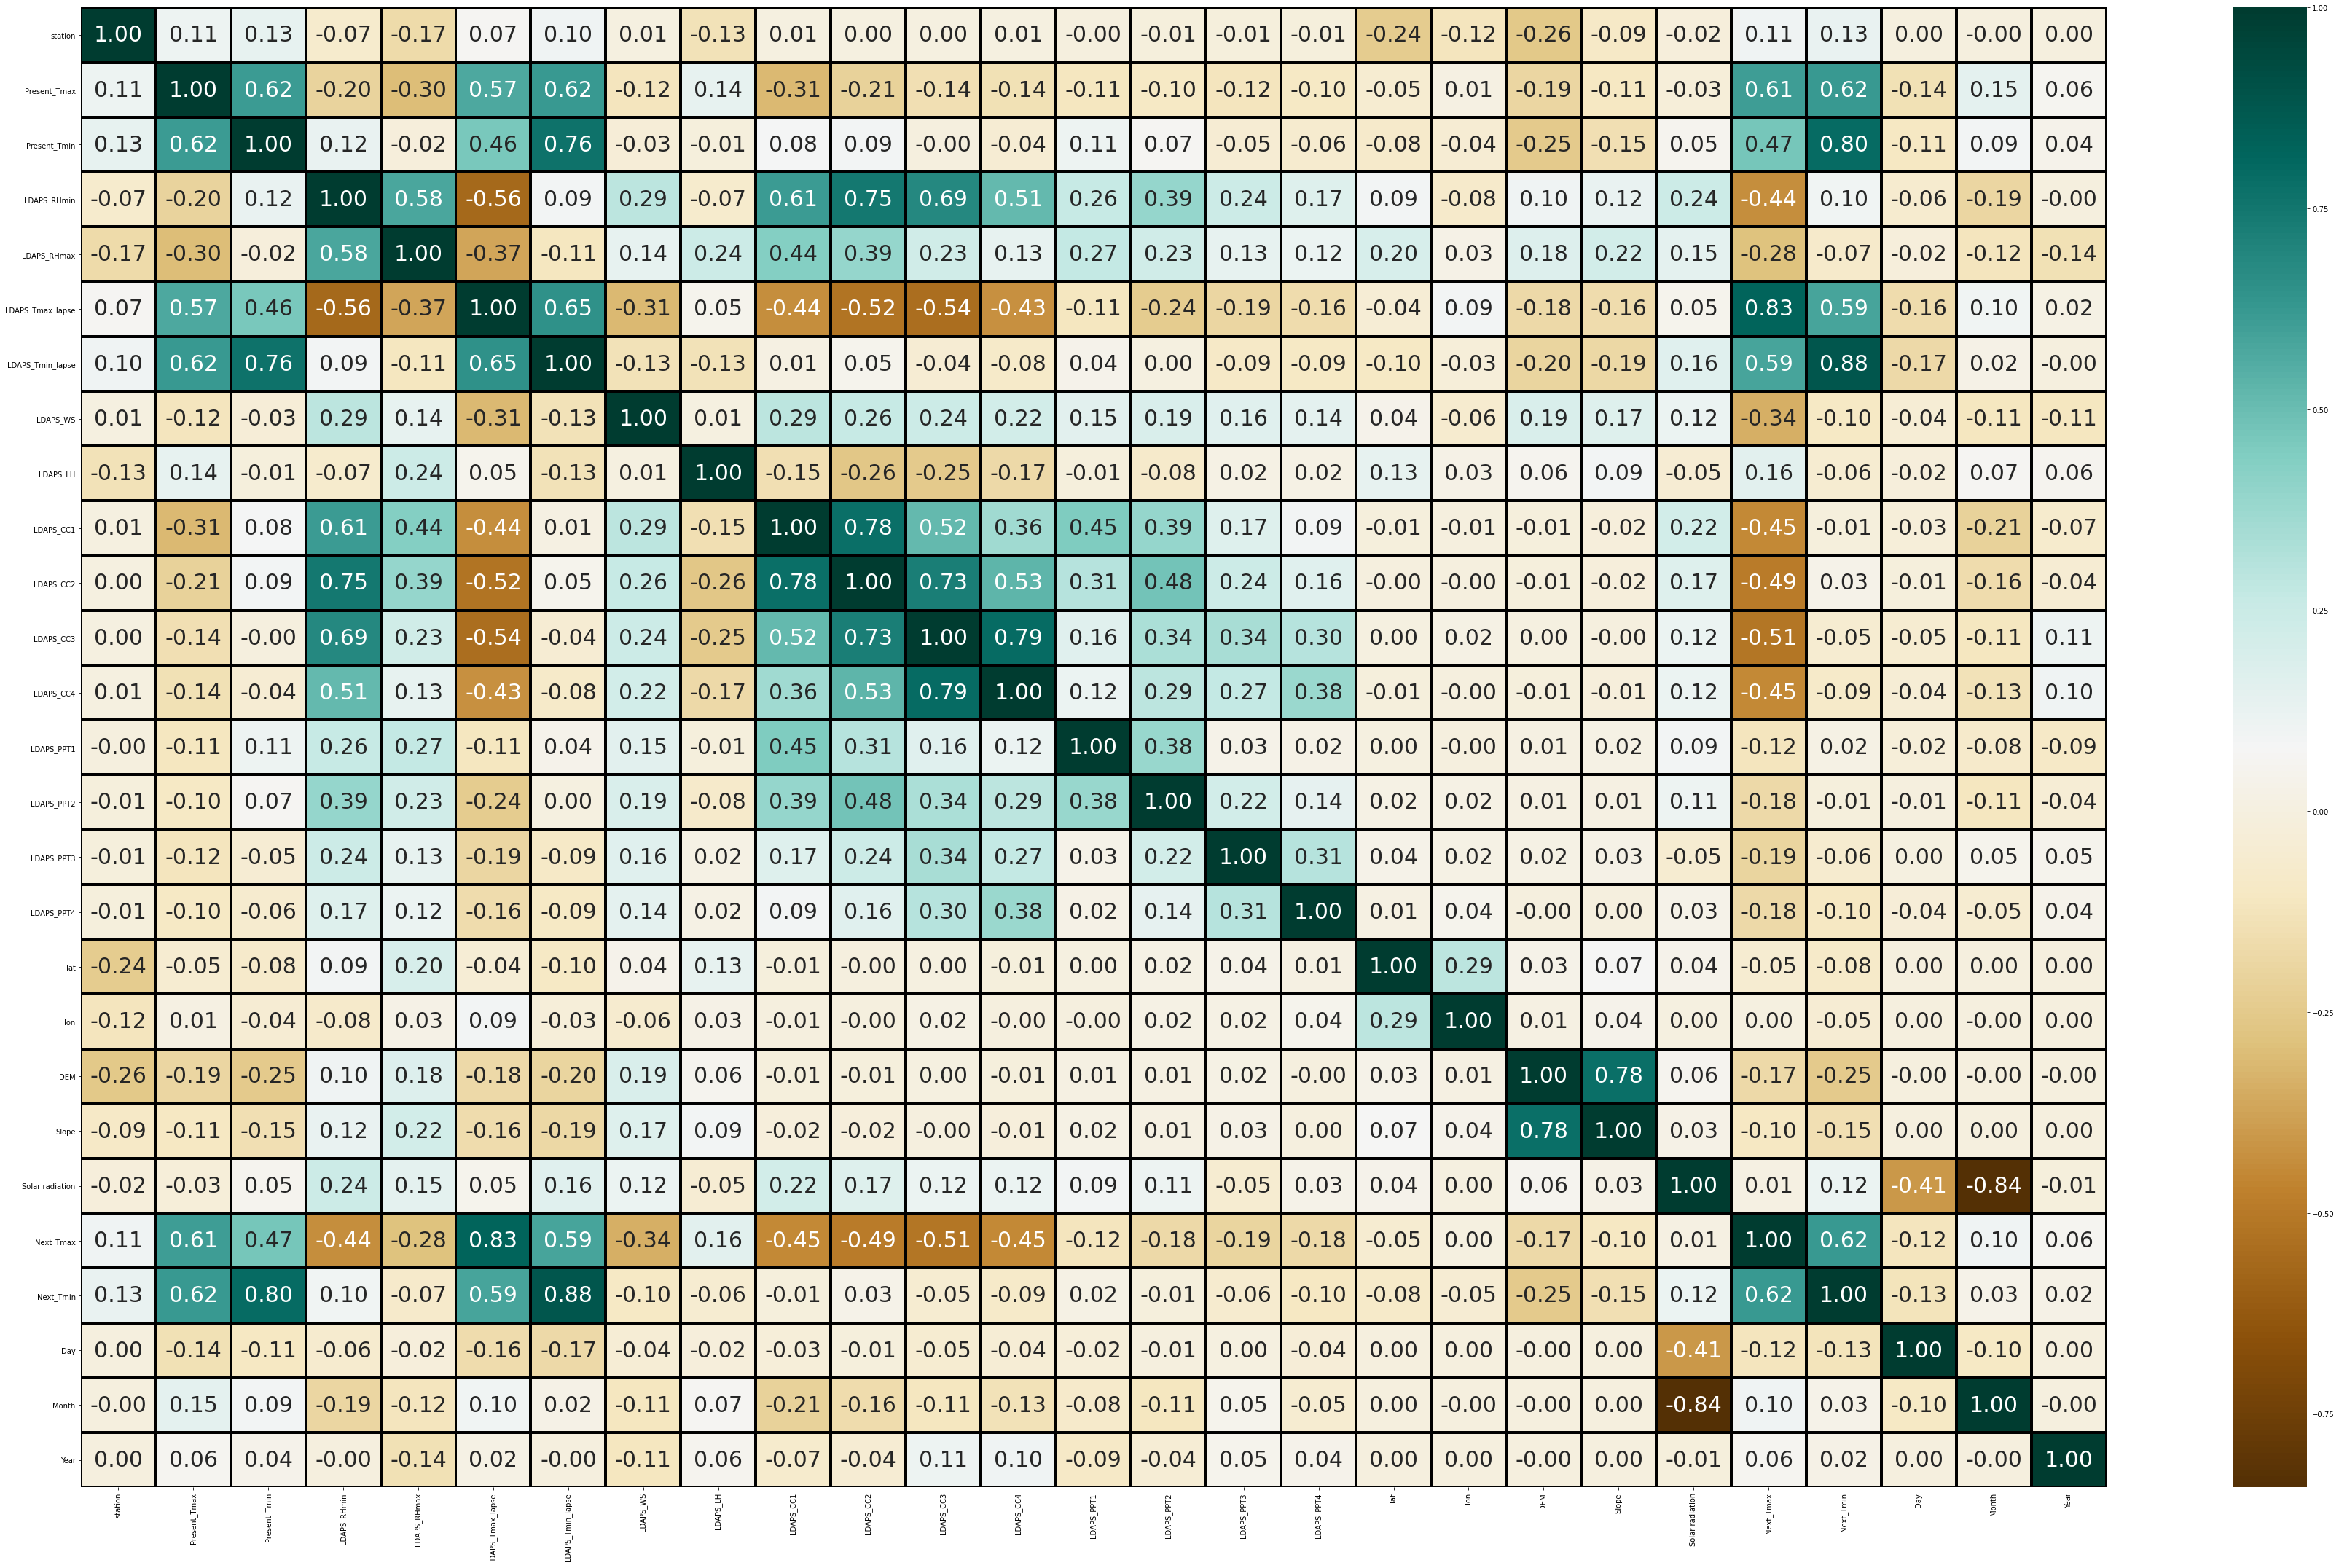

In [80]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True,linewidths =3,fmt='0.2f',cmap="BrBG",annot_kws={"size":30}, linecolor='Black')


LDAPS_CC1, LDAPS_CC2, LDAPS_CC3 ,LDAPS_CC4 and LDAPS_RHmin is negatively correlated with one target column Next_Tmax.

Present_Tmax and Present_Tmax is positively correlated with both the target columns Next_Tmax and Next_Tmin.

LDAPS_Tmax_lapse and LDAPS_Tmin_lapse is positively correlated with both the target columns Next_Tmax and Next_Tmin.



# CHECKING THE COLUMNS WHICH ARE POSITIVELY AND NEGATIVE CORRELATED WITH THE TARGET COLUMNS


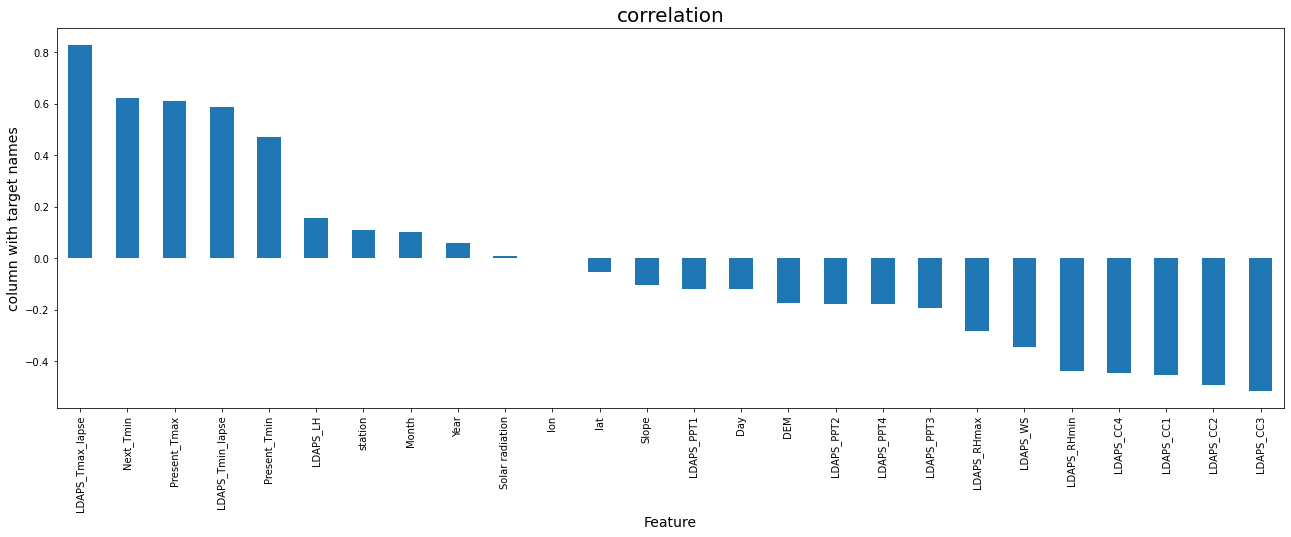

In [81]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=20)
plt.show()

Bar showing upper side is positively correlated and Bar showing down side is negatively correlated with the target column Next_Tmax.

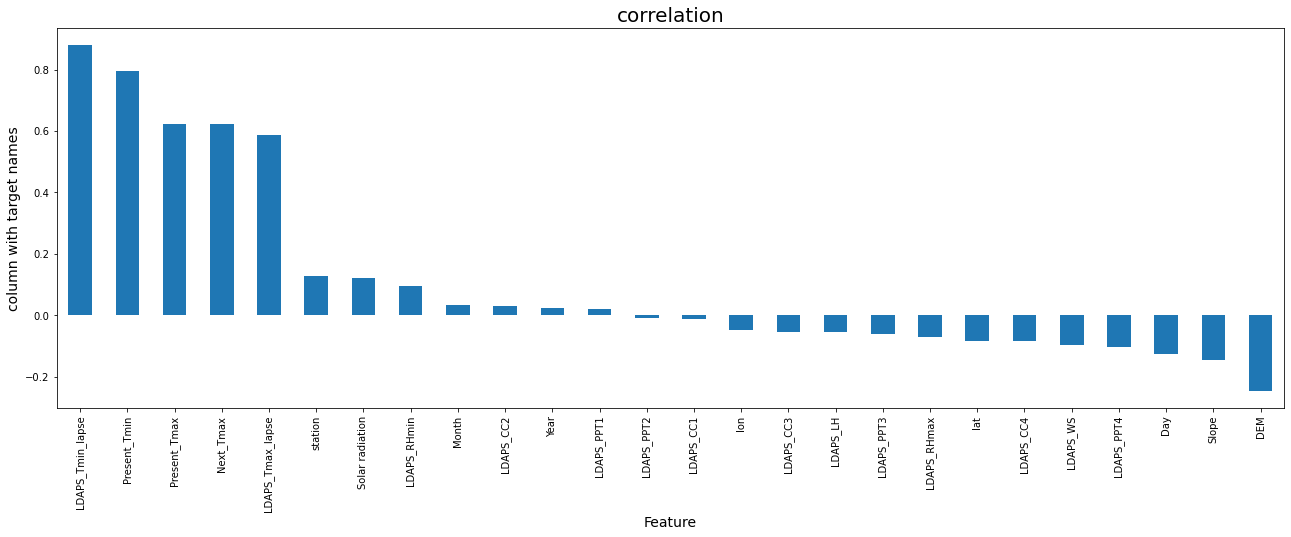

In [82]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=20)
plt.show()

Bar showing upper side is positively correlated and Bar showing down side is negatively correlated with the target column Next_Tmin.



# OUTLIER REMOVAL

In [83]:
from scipy.stats import zscore

In [84]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [96]:
ds=df[(z<3).all(axis=1)]


In [97]:
ds

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


In [87]:
df.shape

(7752, 27)

In [98]:
ds.shape

(6894, 27)

In [99]:
ds.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

858 rows has been removed as a outliers.

# REMOVING SKEWNESS

In [100]:
ds.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
Day                 0.001007
Month              -0.192910
Year                0.010998
dtype: float64

In [92]:
new_df=ds

In [93]:
new_df['LDAPS_PPT1']=np.log(df_new['LDAPS_PPT1'])
new_df['LDAPS_PPT2']=np.log(df_new['LDAPS_PPT2'])
new_df['LDAPS_PPT3']=np.log(df_new['LDAPS_PPT3'])
new_df['LDAPS_PPT4']=np.log(df_new['LDAPS_PPT4'])





In [94]:
new_df.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1               NaN
LDAPS_PPT2               NaN
LDAPS_PPT3               NaN
LDAPS_PPT4               NaN
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
Day                 0.001007
Month              -0.192910
Year                0.010998
dtype: float64

Most of the skewness has been removed during outlier removal , tried removing more skewness but data is becoming NaN so varible new_df will not be take out in further process.

# SEPRATING THE COLUMNS

In [131]:
x=ds.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1=ds['Next_Tmax']
y2=ds['Next_Tmin']

# TRAIN TEST SPLIT FOR BOTH TARGET

In [132]:


x_train, x_test, y1_train, y1_test= train_test_split(x,y1,test_size=.30, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(5170, 25)
(1724, 25)
(5170,)
(1724,)


In [133]:

x_train, x_test, y2_train, y2_test= train_test_split(x,y2,test_size=.30, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(5170, 25)
(1724, 25)
(5170,)
(1724,)


# MODEL BUILDING

# TARGET 1

In [135]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y1_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y1_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y1_test,pred_y))
print('mean squared error', mean_squared_error(y1_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y1_test,pred_y)))

r2 score 0.7619448234150896
error
mean absolute error 1.089536383371648
mean squared error 2.0988888634026854
root mean squared error 1.4487542453441458


In [136]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y1,cv=10)
print('cv score',np.mean(score))


cv score 0.6091427003665352


r2 score is predicting 76% and cv score is predicting 60% accuracy score for Linear Regression.

In [123]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y1_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y1_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y1_test,pred_y))
print('mean squared error', mean_squared_error(y1_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y1_test,pred_y)))


r2 score 0.6858199441874002
error
mean absolute error 1.2748320416598213
mean squared error 2.770067972090884
root mean squared error 1.664352117819689


In [124]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y1,cv=10)
print('cv score',np.mean(score))

cv score 0.8372993269887811


r2 score 68% and cv score is 83% for Lasso.

In [125]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y1_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y1_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y1_test,pred_y))
print('mean squared error', mean_squared_error(y1_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y1_test,pred_y)))



r2 score 0.7618621096440134
error
mean absolute error 1.0895267093545637
mean squared error 2.099618135563252
root mean squared error 1.4490059128807073


In [126]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y1,cv=10)
print('cv score',np.mean(score))

cv score 0.9999998108970874


r2 score is 76% and cv score is 99%.

In [127]:
#For ElasticNet



en=ElasticNet()

en.fit(x_train,y1_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y1_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y1_test,pred_y))
print('mean squared error', mean_squared_error(y1_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y1_test,pred_y)))


r2 score 0.6992805645777926
error
mean absolute error 1.23744038227076
mean squared error 2.6513881490465465
root mean squared error 1.6283083703790713


In [128]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y1,cv=10)
print('cv score',np.mean(score))

cv score 0.7663997870826905


r2 score is 69% and cv score is 76% for elasticnet

In [129]:
# Knr
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y1_train)
print(knr.score(x_train,y1_train))

0.6751114378584768


In [130]:

#For KNR (cross validation)

score=cross_val_score(knr,x,y1,cv=10)
print('cv score',np.mean(score))

cv score 0.639570266054687


Accuracy score is 67% and cv score is 63% for KNR.

# TARGET 2

In [137]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y2_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y2_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y2_test,pred_y))
print('mean squared error', mean_squared_error(y2_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y2_test,pred_y)))

r2 score 0.814596401979444
error
mean absolute error 0.7815757841760342
mean squared error 1.0217361537879706
root mean squared error 1.0108096525993262


In [138]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y2,cv=10)
print('cv score',np.mean(score))


cv score 0.7355904722928853


r2 scoe is 81% and cv score is 73% for linear regression.

In [139]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y2_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y2_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y2_test,pred_y))
print('mean squared error', mean_squared_error(y2_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y2_test,pred_y)))


r2 score 0.7504591803966857
error
mean absolute error 0.9256120196297454
mean squared error 1.3751883995601846
root mean squared error 1.1726842710466379


In [140]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y2,cv=10)
print('cv score',np.mean(score))

cv score 0.6746474087030758


r2 score is 75% and cv score is 67% for Lasso.

In [141]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y2_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y2_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y2_test,pred_y))
print('mean squared error', mean_squared_error(y2_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y2_test,pred_y)))



r2 score 0.8145355604048236
error
mean absolute error 0.7816988234910565
mean squared error 1.0220714441335021
root mean squared error 1.0109754913614386


In [142]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y2,cv=10)
print('cv score',np.mean(score))

cv score 0.7357517782997285


r2 score is 81% and cv score is 73% for Ridge.

In [143]:
#For ElasticNet



en=ElasticNet()

en.fit(x_train,y2_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y2_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y2_test,pred_y))
print('mean squared error', mean_squared_error(y2_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y2_test,pred_y)))


r2 score 0.7764021836035347
error
mean absolute error 0.8718142398478946
mean squared error 1.2322197376934603
root mean squared error 1.110053934587622


In [144]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y2,cv=10)
print('cv score',np.mean(score))

cv score 0.7093859219387485


r2 score is 77% and cv score is 70% for ElasticNet.

In [145]:
# knr
knr=KNeighborsRegressor()
knr.fit(x_train,y2_train)
print(knr.score(x_train,y2_train))

0.6649819154688124


In [146]:

#For KNR (cross validation)

score=cross_val_score(knr,x,y2,cv=10)
print('cv score',np.mean(score))

cv score -0.05865762892589073


accuracy score is 66% and cv score is very low for kNR.

Above predictions from the model , we can say that our model is performing well,

and Linear regression model and ridge model is predicting 81% r2 score and 73% cv score.

# HYPER PARAMETER TUNING


In [156]:
from sklearn.model_selection import GridSearchCV

In [165]:
parameters={'fit_intercept':['bool'],'normalize':['bool']}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y1_train)
print(clf.best_params_)

{'fit_intercept': 'bool', 'normalize': 'bool'}


In [174]:
# FINAL MODEL FOR TARGET 1
rd=Ridge(fit_intercept='bool',normalize='bool')
rd.fit(x_train,y1_train)
rd.score(x_train,y1_train)
rds=r2_score(y1_test,pred_y)
print('r2 score:', rds*100)

rdscore=cross_val_score(rd,x,y1,cv=5)
rdc=rdscore.mean()
print('cross val score:',rdc*100)

r2 score: -615.3956664826476
cross val score: 61.886603343561276


In [168]:
parameters={'fit_intercept':['bool'],'normalize':['bool']}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y2_train)
print(clf.best_params_)

{'fit_intercept': 'bool', 'normalize': 'bool'}


In [173]:
# FINAL MODEL FOR TARGET 2
rd=Ridge(fit_intercept='bool',normalize='b0ol')
rd.fit(x_train,y2_train)
rd.score(x_train,y2_train)
rds=r2_score(y2_test,pred_y)
print('r2 score:', rds*100)

rdscore=cross_val_score(rd,x,y2,cv=5)
rdc=rdscore.mean()
print('cross val score:',rdc*100)

r2 score: 77.64021836035347
cross val score: 66.25127805022746
